In [84]:
from sklearn.ensemble import IsolationForest

import seaborn
from scipy.spatial.distance import pdist, squareform

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [87]:
dataset = pd.read_csv('../data/complete_dataset_fe.csv', dtype={'cyclist_team': str})

#TODO: remove it when you use cleaned data
#TODO: change the attribute name when you use cleaned data
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y-%m-%d')
dataset.info()

'''
cyclists_only_attributes = ['cyclist_url', 'cyclist_name', 'birth_year', 'weight', 'cyclist_bmi', 'nationality'] #'mean_delta', 'mean_positions', 'mean_climb_power'
races_only_attributes = ['race_url', 'race_name', 'points', 'uci_points', 'length', 'climb_total', 'profile', 'startlist_quality', 'date', 'mostly_tarmac', 'race_year', 'race_stage', 'race_season', 'climb_percentage', 'race_physical_effort', 'race_prestige']

general_dataset = dataset.copy()
races_dataset = general_dataset.copy()
cyclists_dataset = races_dataset.pop(cyclists_only_attributes)
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589739 entries, 0 to 589738
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   cyclist_url           589739 non-null  object        
 1   cyclist_name          589739 non-null  object        
 2   birth_year            589739 non-null  int64         
 3   weight                480007 non-null  float64       
 4   height                480007 non-null  float64       
 5   nationality           589739 non-null  object        
 6   race_url              589739 non-null  object        
 7   race_name             589739 non-null  object        
 8   points                589739 non-null  float64       
 9   uci_points            422184 non-null  float64       
 10  length                589739 non-null  float64       
 11  climb_total           475338 non-null  float64       
 12  profile               475338 non-null  float64       
 13 

"\ncyclists_only_attributes = ['cyclist_url', 'cyclist_name', 'birth_year', 'weight', 'cyclist_bmi', 'nationality'] #'mean_delta', 'mean_positions', 'mean_climb_power'\nraces_only_attributes = ['race_url', 'race_name', 'points', 'uci_points', 'length', 'climb_total', 'profile', 'startlist_quality', 'date', 'mostly_tarmac', 'race_year', 'race_stage', 'race_season', 'climb_percentage', 'race_physical_effort', 'race_prestige']\n\ngeneral_dataset = dataset.copy()\nraces_dataset = general_dataset.copy()\ncyclists_dataset = races_dataset.pop(cyclists_only_attributes)\n"

In [89]:
# Ensure dataset is numeric and not NaN
dataset = dataset.dropna()
numeric_dataset = dataset.select_dtypes(include=['number'])
#numeric_dataset = numeric_dataset.dropna()

max_features = numeric_dataset.shape[1]
algorithm = IsolationForest(max_features=max_features)
algorithm.fit(numeric_dataset)

# Calculate outlier degrees and scores
outlier_degrees = algorithm.decision_function(numeric_dataset) + 0.5
outlier_scores = 1 - (algorithm.predict(numeric_dataset) + 1) / 2

# Combine with original dataset
dataset_with_outlier_scores = dataset.copy()
dataset_with_outlier_scores.loc[:, "isolation_forest_degree"] = outlier_degrees
dataset_with_outlier_scores.loc[:, "isolation_forest_scores"] = outlier_scores

<Axes: >

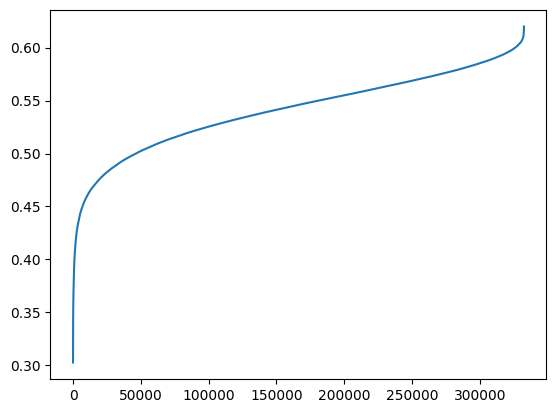

In [90]:
sorted_outlier_degrees = sorted(outlier_degrees)

seaborn.lineplot(
    x=range(dataset_with_outlier_scores.shape[0]),
    y=sorted_outlier_degrees
)

In [91]:
dataset_with_outlier_scores

,cyclist_url,cyclist_name,birth_year,weight,height,nationality,race_url,race_name,points,uci_points,...,raw_position,race_season,cyclist_bmi,cyclist_age_group,climb_percentage,cyclist_climb_power,race_physical_effort,race_prestige,isolation_forest_degree,isolation_forest_scores
2693,sergei-ivanov,Sergei Ivanov,1975,73.0,180.0,Russia,amstel-gold-race/2009/result,Amstel Gold Race,225.0,500.0,...,0,spring,22.530864,>32,0.003581,0.004575,0.080950,0.392946,0.431258,1.0
2694,karsten-kroon,Karsten Kroon,1976,67.0,180.0,Netherlands,amstel-gold-race/2009/result,Amstel Gold Race,225.0,500.0,...,1,spring,20.679012,>32,0.003581,0.004199,0.080950,0.392946,0.452070,1.0
2695,robert-gesink,Robert Gesink,1986,70.0,190.0,Netherlands,amstel-gold-race/2009/result,Amstel Gold Race,225.0,500.0,...,2,spring,19.390582,<25,0.003581,0.000487,0.080950,0.392946,0.440578,1.0
2696,philippe-gilbert,Philippe Gilbert,1982,75.0,178.0,Belgium,amstel-gold-race/2009/result,Amstel Gold Race,225.0,500.0,...,3,spring,23.671254,27-29,0.003581,0.000522,0.080950,0.392946,0.436381,1.0
2697,damiano-cunego,Damiano Cunego,1981,58.0,169.0,Italy,amstel-gold-race/2009/result,Amstel Gold Race,225.0,500.0,...,4,spring,20.307412,27-29,0.003581,0.000404,0.080950,0.392946,0.460868,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589734,daan-hoole,Daan Hoole,1999,81.4,198.0,Netherlands,world-championship/2022/result,World Championships - Road Race,350.0,600.0,...,98,summer,20.763187,<25,0.015613,0.000021,0.250646,0.584334,0.389082,1.0
589735,ben-turner,Ben Turner,1999,74.0,194.0,Great Britain,world-championship/2022/result,World Championships - Road Race,350.0,600.0,...,99,summer,19.662026,<25,0.015613,0.000019,0.250646,0.584334,0.397284,1.0
589736,pavel-sivakov,Pavel Sivakov,1997,70.0,188.0,France,world-championship/2022/result,World Championships - Road Race,350.0,600.0,...,100,summer,19.805342,25-27,0.015613,0.000015,0.250646,0.584334,0.398798,1.0
589737,jake-stewart,Jake Stewart,1999,66.0,179.0,Great Britain,world-championship/2022/result,World Championships - Road Race,350.0,600.0,...,101,summer,20.598608,<25,0.015613,0.000013,0.250646,0.584334,0.408846,1.0


The outlier_degrees array provides a measure of how far each sample is from the decision boundary (the value is normalized):
- Close to 1: More likely to be an inlier.
- Close to 0: More likely to be an outlier.


The outlier_scores array represents a "binarized likelihood" of each data point being an outlier (scores values are 0 or 1):
- 1: More likely to be an outlier.
- 0: More likely to be an inlier.

In [101]:
degree_threshold = 0.45

# Combine thresholds for outlier detection
dataset_with_outlier_scores["is_outlier"] = (
    (dataset_with_outlier_scores["isolation_forest_scores"] == 1) &
    (dataset_with_outlier_scores["isolation_forest_degree"] < degree_threshold)
)

len(dataset_with_outlier_scores[dataset_with_outlier_scores["is_outlier"] == 1])

6912

In [102]:
filtered = dataset_with_outlier_scores[dataset_with_outlier_scores["is_outlier"] == 1]

filtered.describe()

,birth_year,weight,height,points,uci_points,length,climb_total,profile,startlist_quality,date,...,delta,race_year,raw_position,cyclist_bmi,climb_percentage,cyclist_climb_power,race_physical_effort,race_prestige,isolation_forest_degree,isolation_forest_scores
count,6912.000000,6912.000000,6912.000000,6912.000000,6912.000000,6912.000000,6912.000000,6912.000000,6912.000000,6912,...,6912.000000,6912.000000,6912.000000,6912.000000,6912.000000,6.912000e+03,6.912000e+03,6912.000000,6912.000000,6912.0
mean,1982.688947,70.111328,180.305411,215.536748,367.577257,201.254883,3.230543,3.059172,1114.599971,2012-02-26 04:55:37.500000,...,547.943866,2011.636863,60.611979,21.522024,0.079036,6.962760e-03,2.620172e-01,0.388704,0.423997,1.0
min,1963.000000,48.000000,159.000000,20.000000,6.000000,1.150000,0.006000,1.000000,156.000000,2001-03-28 00:00:00,...,0.000000,2001.000000,0.000000,16.604275,0.000587,3.785470e-07,7.887853e-08,0.000000,0.302579,1.0
25%,1975.000000,64.000000,175.000000,80.000000,20.000000,190.850000,1.923000,2.000000,886.000000,2005-05-20 00:00:00,...,13.000000,2005.000000,11.750000,20.356103,0.007992,2.092424e-05,3.990095e-02,0.166987,0.413309,1.0
50%,1982.000000,70.000000,180.000000,275.000000,500.000000,251.000000,3.442000,2.000000,1087.000000,2011-05-22 00:00:00,...,201.000000,2011.000000,50.000000,21.447568,0.017214,1.057625e-04,1.845964e-01,0.363776,0.432061,1.0
75%,1990.000000,76.000000,186.000000,350.000000,600.000000,261.000000,4.576000,5.000000,1353.000000,2018-08-12 12:00:00,...,751.750000,2018.000000,101.000000,22.587833,0.027495,2.636758e-03,5.131381e-01,0.559685,0.442803,1.0
max,2003.000000,94.000000,204.000000,350.000000,800.000000,305.000000,6.939000,5.000000,1812.000000,2023-07-29 00:00:00,...,34758.000000,2023.000000,194.000000,26.775510,1.012105,1.000000e+00,8.952876e-01,0.908128,0.449997,1.0
std,9.032900,8.054174,7.522390,117.207697,264.516798,95.477403,1.757858,1.630487,324.958025,NaN,...,852.439510,7.260940,51.699900,1.631351,0.206807,2.551285e-02,2.479606e-01,0.246489,0.025304,0.0
